# Exploring the Data - Visualization

Let's dive a little deeper into understanding the data set.  We know from the last exercise, that the data has some semantic errors - namely there are trips with no_distance.  

First we'll load in the data like last time:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

green = pd.read_csv("green_tripdata_2015-09.csv")

Now we'll filter the dataset to only those with no distance:

In [2]:
no_distance = green[green["Trip_distance"] == 0]

no_distance.shape

(20592, 21)

In [3]:
no_distance.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')

Now visualize the range of values that people paid to travel zero distance.  For this you should use the variable `Fare_amount`.  Please plot the data as a histogram.

(array([9.96154842e-07, 4.98077421e-07, 9.96154842e-07, 6.97308390e-06,
        7.28587652e-03, 2.88087980e-03, 5.18000518e-05, 1.34480904e-05,
        1.04596258e-05, 4.48269679e-06]),
 array([-475. , -377.5, -280. , -182.5,  -85. ,   12.5,  110. ,  207.5,
         305. ,  402.5,  500. ]),
 <a list of 10 Patch objects>)

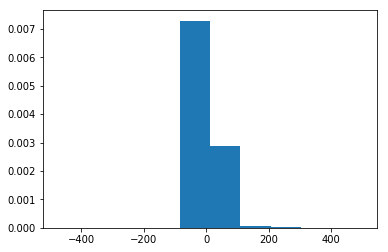

In [5]:
# exercise goes here

plt.hist(no_distance["Fare_amount"], density=True)

# Bonus exercise

If you read through the optional material in the last section, then you can do this exercise - Make use of pomegranate a distribution fitting library to figure out a reasonable dimension 

Normally Distributed 2370
Exponentially Distributed 18222


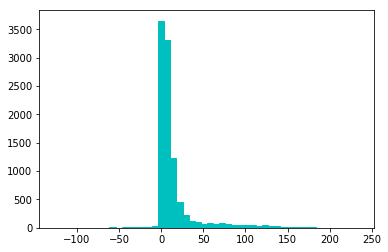

In [12]:
import numpy as np
import pomegranate as pom

X = np.array(no_distance["Fare_amount"])
X = X.reshape(-1, 1)
model = pom.GeneralMixtureModel.from_samples(
    [pom.NormalDistribution, pom.ExponentialDistribution],
    n_components=3, X=X)
labels = model.predict(X)
label_mapping = ["Normally Distributed", "Exponentially Distributed"]
for elem in zip(set(labels), np.bincount(labels)):
    print(label_mapping[elem[0]], elem[1])

samples = [ model.sample() for _ in range(10000) ]
plt.hist( samples, edgecolor='c', color='c', bins=50 )
plt.show()